Actividad 1: Simulación Estocástica

**Curso:** TEMAS SELECTOS 1 (O25-LAT4032-1)  
**Profesor:** Rubén Blancas Rivera  
**Alumno:** 
**Universidad:** Universidad de las Américas Puebla  
**Fecha:** 2025-08-15  
**Ejercicios:** Impares.

# Funciones para graficar

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [6]:
def histograma(muestras, montecarlo, bins=50):
    fig, ax = plt.subplots(figsize=(10, 6))
    n, _, _ = ax.hist(muestras, bins=bins, alpha=0.7)
    ax.axvline(montecarlo, color='r', linestyle='--',
               linewidth=2, zorder=3, label=f'Monte Carlo {montecarlo:.4f}')
    xmin, xmax = ax.get_xlim()
    if montecarlo < xmin or montecarlo > xmax:
        ax.set_xlim(min(xmin, montecarlo), max(xmax, montecarlo))
    ax.set_title('Muestras')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend(facecolor='white', edgecolor='none')
    plt.tight_layout()
    plt.show()

In [8]:
def tlc(muestras, valor_verdadero=None):

    k = len(muestras)
    medias = np.cumsum(muestras) / np.arange(1, k + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(medias)
    plt.xlabel('Número de simulaciones')
    plt.ylabel('Media acumulada')
    plt.title(f'Convergencia de la media Monte Carlo')
    plt.axhline(y=medias[-1], color='r', linestyle='--', label=f'Media final {medias[-1]:.4f}')
    if valor_verdadero is not None:
        plt.axhline(y=valor_verdadero, color='g', linestyle='--', label=f'Valor verdadero {valor_verdadero:.4f}')
    plt.legend(facecolor='white', edgecolor='none')
    plt.gca().yaxis.set_ticks_position('right')
    plt.gca().yaxis.set_label_position('right')
    plt.show()

# Ejercicio 1

Si $x_0 = 5$ y $x_n = 2x_{{n-1}} \bmod 150$. Encontrar $x_1, \dots, x_{{10}}$.

$$
x_n = ax_{n-1} \bmod m
$$

$$
10 = 2 \cdot 5 \bmod 150 \\

20 = 10 \cdot 5 \bmod 150 \\

40 = 20 \cdot 5 \bmod 150 \\

80 = 40 \cdot 5 \bmod 150 \\

10 = 80 \cdot 5 \bmod 150 \\

\vdots
$$

In [1]:
pseudoaleatorios = []

x0 = 5
a = 2
m = 150

for i in range(10):
    xn = (a * x0) % m
    x0 = xn
    pseudoaleatorios.append(xn)

pseudoaleatorios

[10, 20, 40, 80, 10, 20, 40, 80, 10, 20]

# Ejercicio 3

$$\int_{0}^{1} \exp(e^x)\,dx$$

Sea
$$
\theta = \int_{0}^{1} \exp\!\big(e^{x}\big)\,dx.
$$

Reescritura como valor esperado con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}\!\left[\exp\!\big(e^{U}\big)\right].
$$

Estimador Monte Carlo con $u_1,\dots,u_K \stackrel{\text{iid}}{\sim} \mathrm{Unif}(0,1)$:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} \exp\!\big(e^{u_i}\big).
$$


In [ ]:
def h(u):
    return np.exp(np.exp(u))

k = 10000

u = np.random.random(k)

muestras = h(u)
montecarlo = muestras.mean()
montecarlo

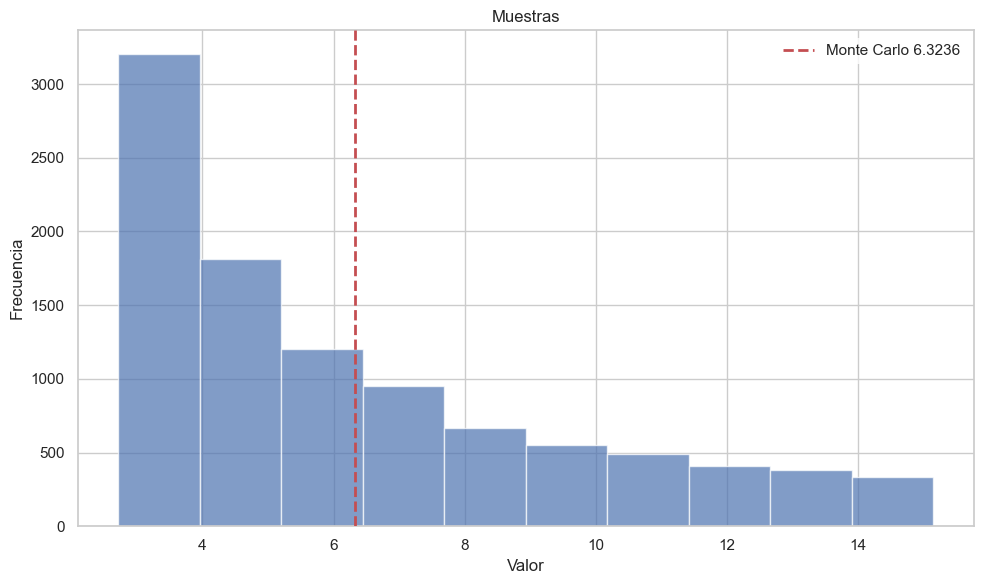

In [155]:
histograma(muestras, montecarlo, bins=10)

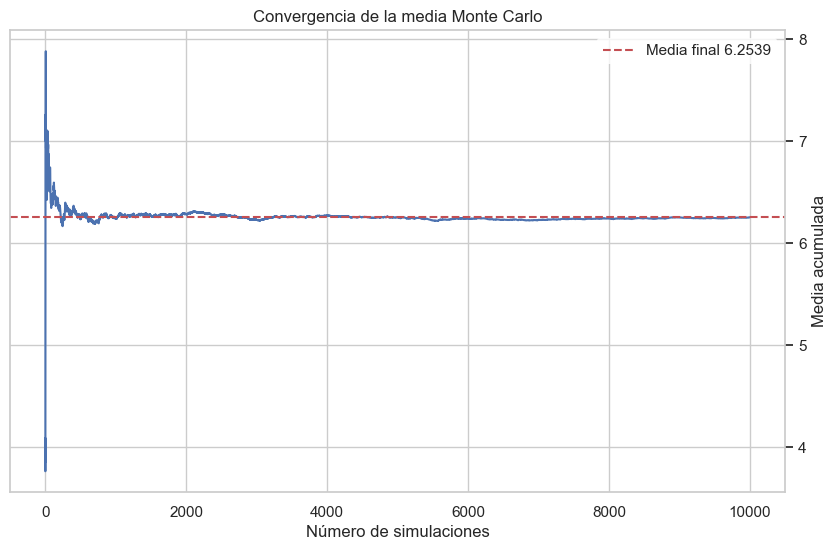

In [95]:
tlc(muestras)

# Ejercicio 5

$$\int_{-2}^{2} e^{x+x^2} \, dx$$


Sea
$$
\theta=\int_{-2}^{2} e^{x+x^2}\,dx.
$$

Cambio de variable a \([0,1]\):
$$
u=\frac{x-(-2)}{2-(-2)}=\frac{x+2}{4},\qquad x=-2+4u,\qquad dx=4\,du.
$$

Entonces
$$
\theta=\int_{0}^{1} 4\,\exp\!\big[(-2+4u)+(-2+4u)^2\big]\,du.
$$

Forma de valor esperado con $U\sim\mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}\!\left[g(U)\right],\qquad
g(u)=4\,\exp\!\big[(-2+4u)+(-2+4u)^2\big].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} g(u_i),\qquad u_i\stackrel{iid}{\sim}\mathrm{Unif}(0,1).
$$


In [ ]:
def h(u):
    return (b-a)*np.exp(a+(b-a)*u + (a+(b-a)*u)**2)

k = 10000
a = -2
b = 2
u = np.random.random(k)

muestras = h(u)
montecarlo = muestras.mean()
montecarlo

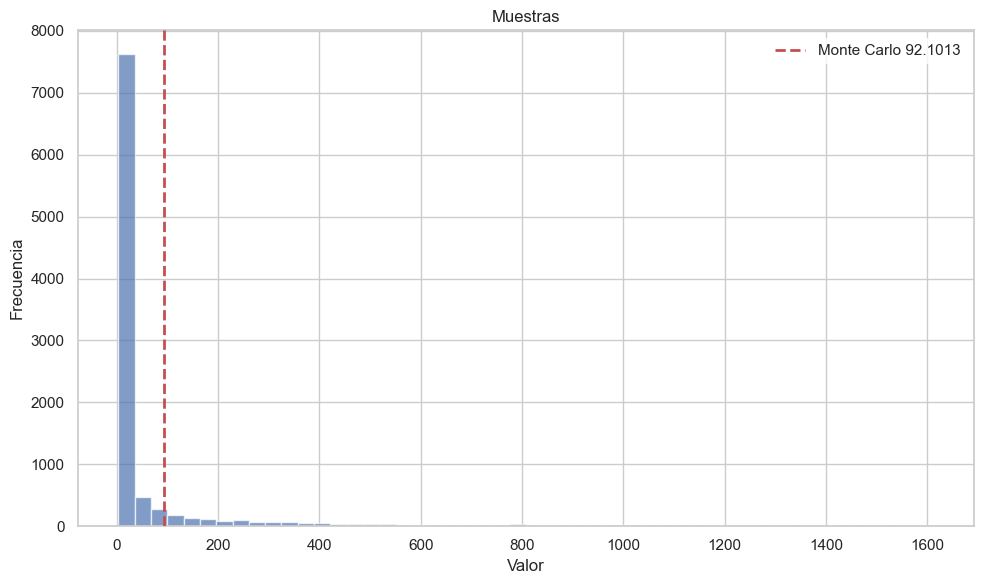

In [89]:
histograma(muestras, montecarlo)

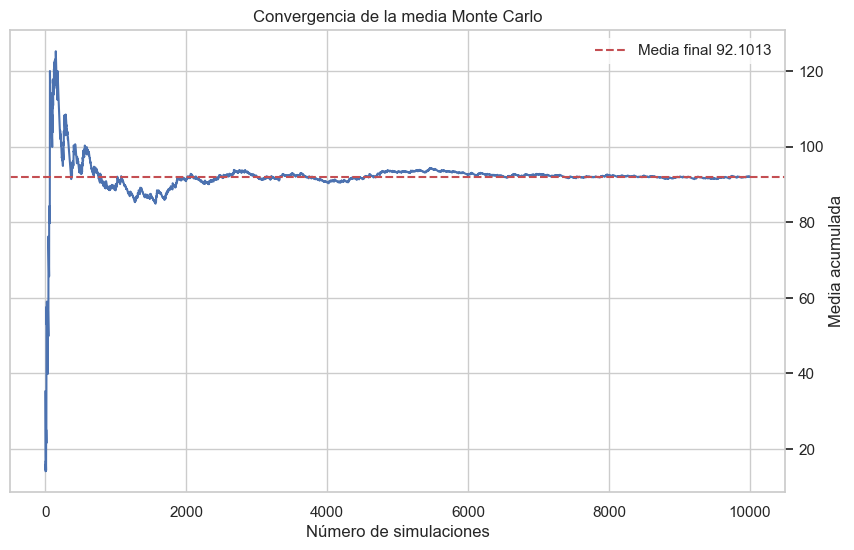

In [90]:
tlc(muestras)

# Ejercicio 7

$$\int_{0}^{\infty} \frac{x}{(1+x^2)^2} \, dx$$

## Estimación Monte Carlo

Sea:
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx.
$$

Cambio: 
$$
y=\frac{1}{x+1},\qquad dy=-\frac{dx}{(x+1)^2}=-y^{2}\,dx.
$$

Entonces:
$$
\theta=\int_{0}^{1} h(y)\,dy,\qquad 
h(y)=\frac{g\!\left(\tfrac{1}{y}-1\right)}{y^{2}},\quad 
g(x)=\frac{x}{(1+x^{2})^{2}}.
$$

Forma de esperanza con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}[\,h(U)\,].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} h(u_i),
\quad u_i\stackrel{\text{iid}}{\sim}\mathrm{Unif}(0,1).
$$


In [28]:
def g(x):
    return x / (1 + x**2)**2

def h(u):
    return g(1/u-1)/u**2

k = 10_000

u = np.random.random(k)
muestras = h(u)
montecarlo = muestras.mean()
montecarlo

np.float64(0.49866109059716657)

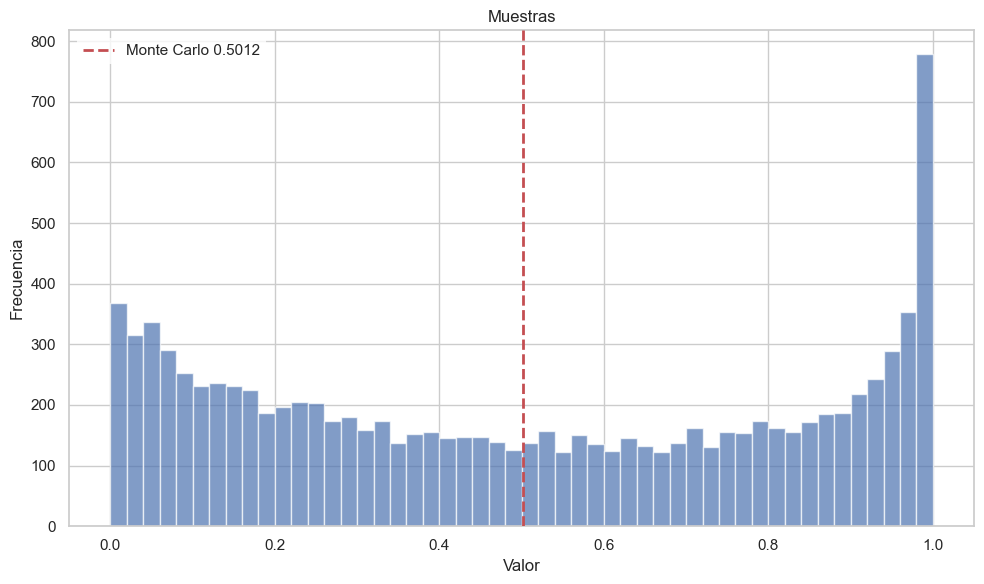

In [102]:
histograma(muestras, montecarlo)

## Calculo analítico

Sea
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx.
$$

Integral impropia:
$$
\theta=\lim_{b\to\infty}\int_{0}^{b}\frac{x}{(1+x^2)^2}\,dx.
$$

Sustitución $u=1+x^2\Rightarrow du=2x\,dx$:
cuando $x=0\Rightarrow u=1$, cuando $x=b\Rightarrow u=1+b^2$.
Entonces
$$
\int_{0}^{b}\frac{x}{(1+x^2)^2}\,dx
=\frac12\int_{1}^{\,1+b^2} u^{-2}\,du.
$$

Primitiva:
$$
\int u^{-2}\,du=-u^{-1}+C.
$$

Evaluación:
$$
\frac12\Big[-u^{-1}\Big]_{1}^{\,1+b^2}
=\frac12\!\left(-\frac{1}{1+b^2}+1\right).
$$

Límite:
$$
\theta=\lim_{b\to\infty}\frac12\!\left(1-\frac{1}{1+b^2}\right)
=\frac12.
$$

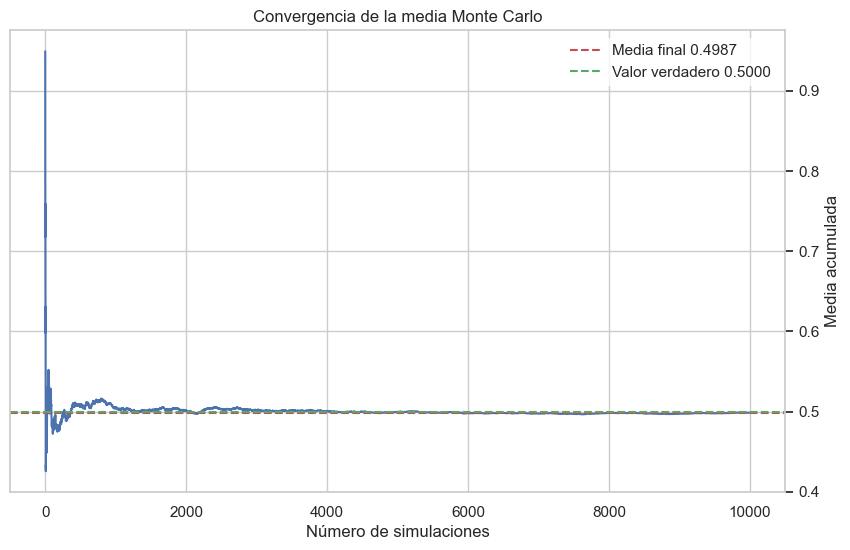

In [29]:
tlc(muestras, 1/2)

# Ejercicio 9


$$\int_{0}^{1} \int_{0}^{1} e^{(x+y)^2} \, dy \, dx$$



Sea:
$$
\theta=\int_{0}^{1}\!\!\int_{0}^{1} e^{(x+y)^2}\,dy\,dx.
$$

Entonces:  
$$
\theta=\int_{0}^{1}\!\!\int_{0}^{1} g(x_1,x_2)\,dx_1\,dx_2,
\qquad g(x_1,x_2)=e^{(x_1+x_2)^2}.
$$

Sabemos que: 
$$
\theta=\mathbb{E}\big[g(U_1,U_2)\big],
\quad U_1,U_2\stackrel{iid}{\sim}\mathrm{Unif}(0,1). \;\; 
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_k=\frac{1}{k}\sum_{i=1}^{k} g(u_{i1},u_{i2})
=\frac{1}{k}\sum_{i=1}^{k} \exp\!\big((u_{i1}+u_{i2})^{2}\big),
\quad (u_{i1},u_{i2})\stackrel{iid}{\sim}\mathrm{Unif}(0,1).
$$

In [ ]:
def h(u1, u2):
    return np.exp((u1 + u2)**2)

k = 10000

u1 = np.random.random(k)
u2 = np.random.random(k)
muestras = h(u1, u2)
montecarlo = muestras.mean()
montecarlo

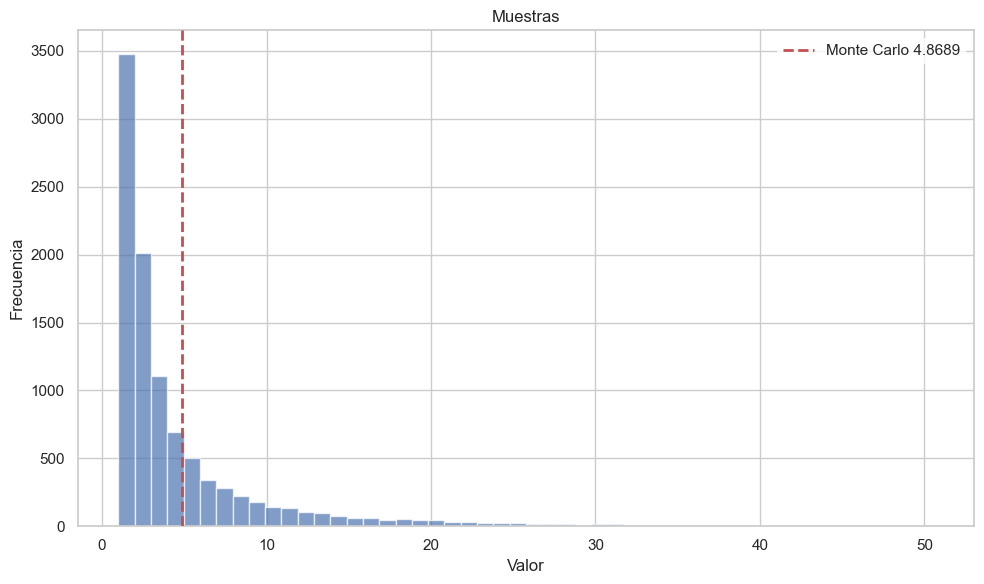

In [104]:
histograma(muestras, montecarlo)

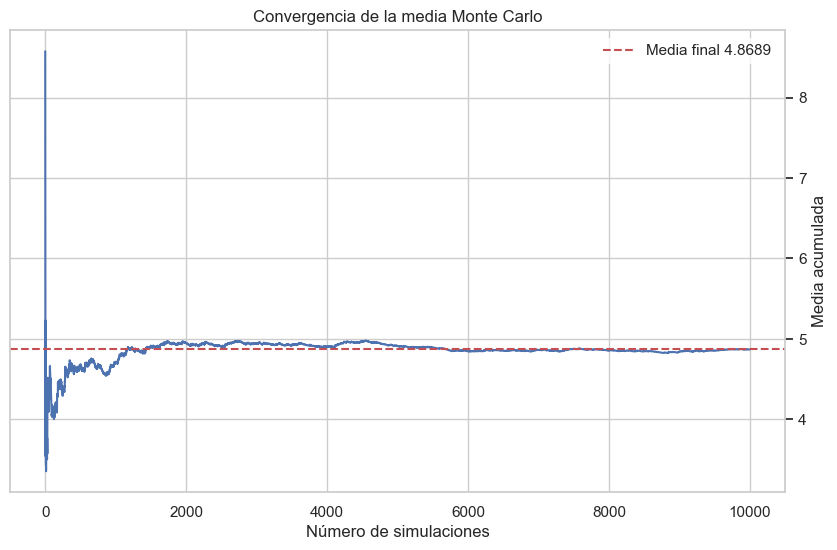

In [105]:
tlc(muestras)

# Ejercicio 11

Usar simulación para aproximar $\operatorname{{Cov}}(U, e^U)$, donde $U \sim \mathcal U(0,1)$.
Comparar con la respuesta exacta.

Asumo $U\sim\mathrm{Unif}(0,1)$.

Por definición,

$$
\operatorname{Cov}(X,Y)=\mathbb{E}\big[(X-\mathbb{E}X)(Y-\mathbb{E}Y)\big].
$$

Expansión lineal:

$$
\operatorname{Cov}(X,Y)=\mathbb{E}[XY]-\mathbb{E}[X]\;\mathbb{E}[Y].
$$

Aplicando a $X=U$ y $Y=e^{U}$:

$$
\operatorname{Cov}(U,e^{U})=\mathbb{E}\!\big[U e^{U}\big]-\mathbb{E}[U]\;\mathbb{E}[e^{U}].
$$




## Estimación Monte Carlo

Sea $u_1,\dots,u_K\stackrel{iid}{\sim}\mathrm{Unif}(0,1)$. Entonces

$$
\widehat{\mu}_U=\frac{1}{K}\sum_{i=1}^{K} u_i,\qquad
\widehat{\mu}_{e}=\frac{1}{K}\sum_{i=1}^{K} e^{u_i},\qquad
\widehat{m}=\frac{1}{K}\sum_{i=1}^{K} u_i e^{u_i}.
$$

Entonces:

$$
\;\widehat{\operatorname{Cov}}^{(MC)}=\widehat{m}-\widehat{\mu}_U\,\widehat{\mu}_{e}\;
$$


## Cálculo analítico


### $\mathbb{E}[U]$

$$
\int_{0}^{1}u\,du=\left[\frac{u^{2}}{2}\right]_{0}^{1}
=\frac{1^{2}}{2}-\frac{0^{2}}{2}=\frac12.
$$

### $\mathbb{E}[e^{U}]$

$$
\int_{0}^{1}e^{u}\,du=\left[e^{u}\right]_{0}^{1}
=e^{1}-e^{0}=e-1.
$$

### $\mathbb{E}[Ue^{U}]$ (por partes)


$$
\int_{0}^{1} x\,e^{x}\,dx,\qquad
\begin{cases}
u=x &\Rightarrow\ du=dx,\\[2pt]
dv=e^{x}\,dx &\Rightarrow\ v=e^{x}.
\end{cases}
$$


$$
\int_a^b u\,dv=\Big[u\,v\Big]_a^b-\int_a^b v\,du.
$$


$$
\Big[x\,e^{x}\Big]_{0}^{1}-\int_{0}^{1} e^{x}\,dx
=\big(1\cdot e-0\cdot 1\big)-\Big[e^{x}\Big]_{0}^{1}
=e-(e-1)=1.
$$



### Covarianza

$$
\operatorname{Cov}(U,e^{U})=\mathbb{E}[Ue^{U}]-\mathbb{E}[U]\mathbb{E}[e^{U}]
=1-\frac12\,(e-1)=\frac{3-e}{2} = 0.140859086
$$



In [119]:
def valor_esperado_1(u):
    return u * np.exp(u)

def valor_esperado_2(u):
    return u

def valor_esperado_3(u):
    return np.exp(u)

k = 1000000

u = np.random.random(k)

montecarlo = valor_esperado_1(u).mean() - valor_esperado_2(u).mean() * valor_esperado_3(u).mean()

In [120]:
montecarlo

np.float64(0.1406986786630252)

In [121]:
1 - 1/2*(np.e -1)

0.14085908577047745

# Ejercicio 13

Para variables aleatorias uniformes $U_1, U_2, \ldots$ definir
$$N = \min\left\{ n : \sum_{i=1}^{n} U_i > 1 \right\}.$$
Estimar $\mathbb E[N]$ por simulación con:
a) 100 valores,  b) 1000 valores,  c) 10000 valores,  d) Discutir el valor esperado.



```text
PSEUDOCÓDIGO — MINIMO_N(k)
total_contadores ← 0
PARA i ← 1 HASTA k HACER:
    suma ← 0
    contador ← 0
    MIENTRAS suma < 1 HACER:
        contador ← contador + 1
        suma ← UNIFORME(0,1)
    total_contadores ← total_contadores + contador
RETORNAR total_contadores / k
```


In [123]:
def minimo_N(k):
    lista_contadores = []
    for _ in range(k):
        suma = 0
        contador = 0
        while suma < 1:
            contador += 1
            suma += np.random.random()
        lista_contadores.append(contador)
    return lista_contadores

## 100 valores

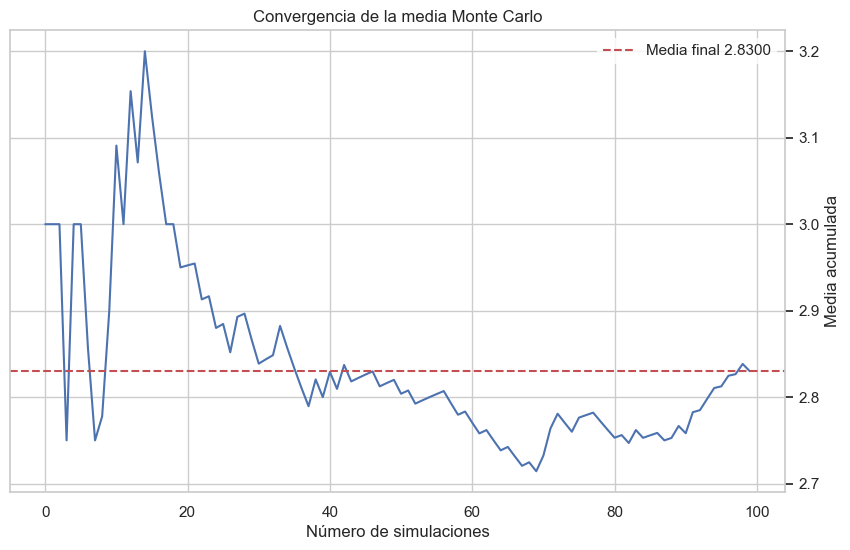

In [138]:
tlc(minimo_N(100))

## 1000 valores

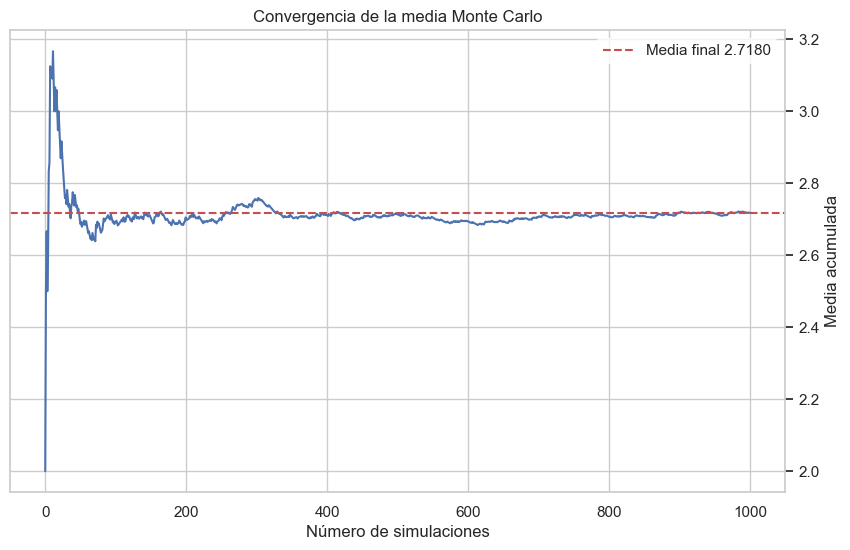

In [139]:
tlc(minimo_N(1000))

## 10000 valores

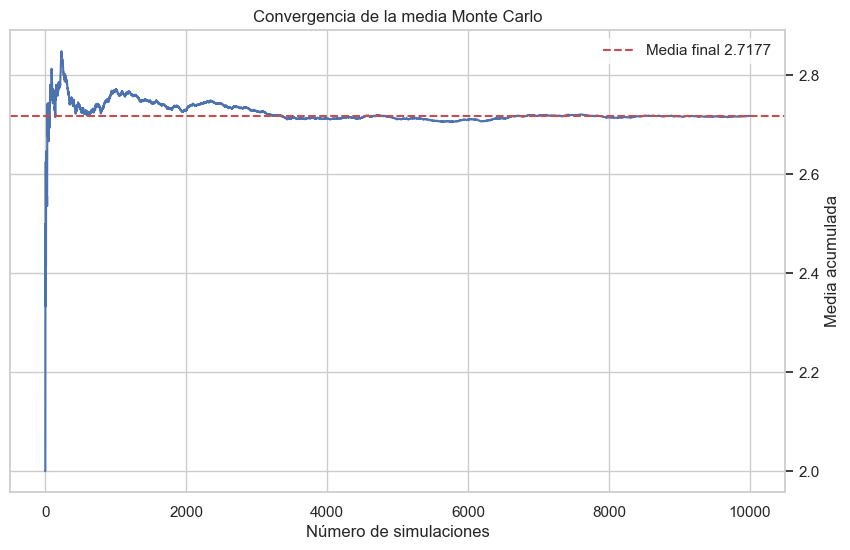

In [140]:
tlc(minimo_N(10000))

## Discución de $n$

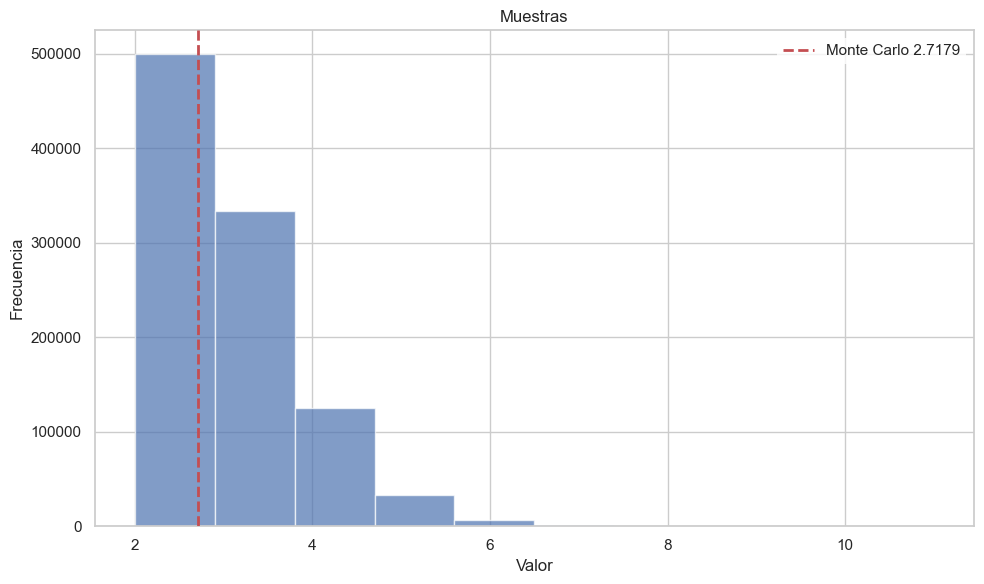

In [ ]:
muestras = minimo_N(1000000)
montecarlo = np.mean(muestras)
histograma(muestras, montecarlo, bins=10)

In [34]:
np.e

2.718281828459045

# Ejercicio 2

Si $x_0=3$ y $x_n=(5x_{n-1}+7)\bmod 200$. Encontrar $x_1,\ldots,x_{10}$.

$$
x_n = ax_{n-1} \bmod m
$$

$$
22 = (5 \cdot 3 + 7) \bmod 200 \\

117 = (22 \cdot 3 + 7) \bmod 200 \\

192 = (117 \cdot 3 + 7) \bmod 200 \\

167 = (192 \cdot 3 + 7) \bmod 200 \\

42 = (167 \cdot 3 + 7) \bmod 200 \\

17 = (42 \cdot 3 + 7) \bmod 200 \\

92 = (17 \cdot 3 + 7) \bmod 200 \\

67 = (92 \cdot 3 + 7) \bmod 200 \\

142 = (67 \cdot 3 + 7) \bmod 200 \\

117 = (142 \cdot 3 + 7) \bmod 200 \\


\vdots
$$

In [6]:
pseudoaleatorios = []

x0 = 3
a = 5
m = 200
c = 7

for i in range(10):
    xn = (a * x0 + c) % m
    x0 = xn
    pseudoaleatorios.append(xn)

pseudoaleatorios

[22, 117, 192, 167, 42, 17, 92, 67, 142, 117]

# Ejercicio 4

$$\int_{0}^{1} (1-x^2)^{3/2}\,dx.$$

In [10]:
def h(u):
    return (1-u**2)**(3/2)

k = 10000

u = np.random.random(k)

muestras = h(u)
montecarlo = muestras.mean()
montecarlo

np.float64(0.5908002098179772)

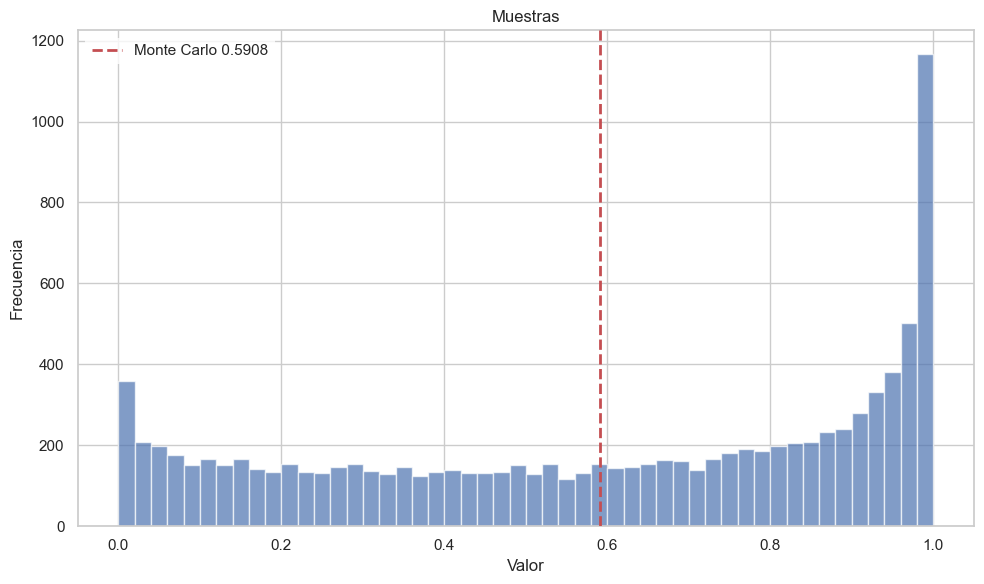

In [18]:
histograma(muestras, montecarlo)

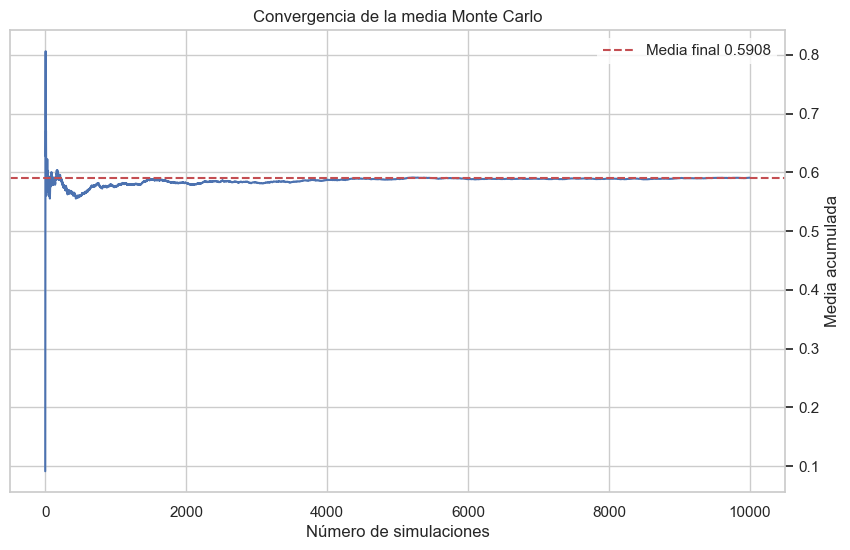

In [21]:
tlc(muestras)

# Ejercicio 6

$$\int_{0}^{\infty} e^{-x}\,dx.$$

Integrando es la densidad $\mathrm{Exp}(1)$, por lo que el valor exacto es $1$.

## Estimación Monte Carlo

Sea:
$$
\theta=\int_{0}^{\infty} e^{-x}\,dx.
$$

Cambio: 
$$
y=\frac{1}{x+1},\qquad dy=-\frac{dx}{(x+1)^2}=-y^{2}\,dx.
$$

Entonces:
$$
\theta=\int_{0}^{1} h(y)\,dy,\qquad 
h(y)=\frac{g\!\left(\tfrac{1}{y}-1\right)}{y^{2}},\quad 
g(x)= e^{-x}.
$$

Forma de esperanza con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}[\,h(U)\,].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} h(u_i),
\quad u_i\stackrel{\text{iid}}{\sim}\mathrm{Unif}(0,1).
$$

In [30]:
def g(x):
    return np.exp(-x)

def h(u):
    return g(1/u-1)/u**2

k = 10_000

u = np.random.random(k)
muestras = h(u)
montecarlo = muestras.mean()
montecarlo

np.float64(1.0021076498480435)

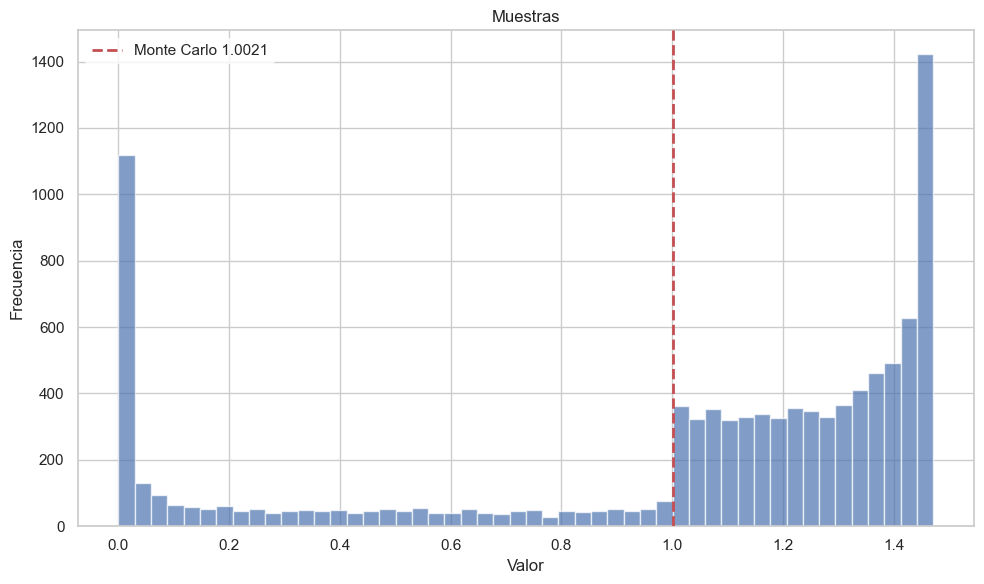

In [31]:
histograma(muestras, montecarlo)

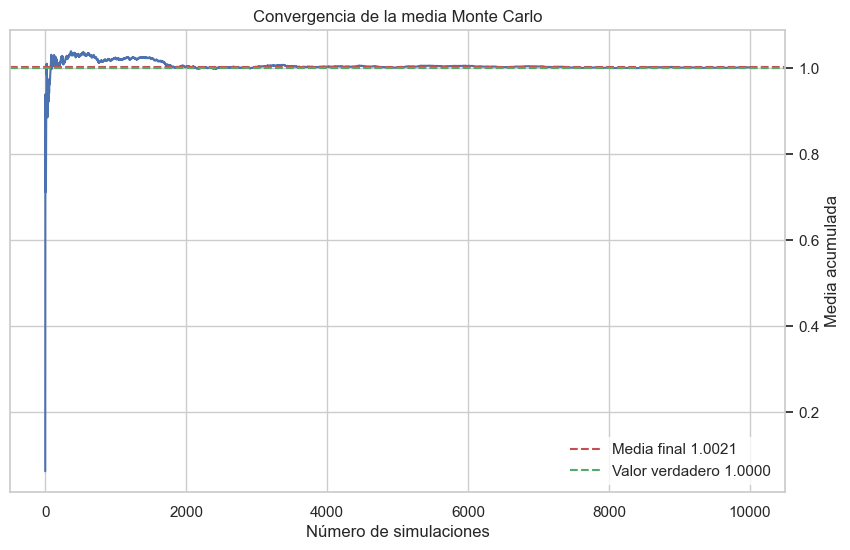

In [32]:
tlc(muestras, 1)

# Ejercicio 8

$$\int_{-\infty}^{\infty} e^{-x^2}\,dx.$$

Integrando, el valor exacto es $\sqrt{\pi}$ (Lo vimos en análisis II).

## Estimación Monte Carlo

Sea:
$$
\theta=\int_{-\infty}^{\infty} e^{-x^2}\,dx.
$$

Como tiene símetria par, $g(x) = g(-x)$:

$$
\theta=2\int_{0}^{\infty} e^{-x^2}\,dx.
$$

Cambio: 
$$
y=\frac{1}{x+1},\qquad dy=-\frac{dx}{(x+1)^2}=-y^{2}\,dx.
$$

Entonces:
$$
\theta=2 \int_{0}^{1} h(y)\,dy,\qquad 
h(y)=\frac{g\!\left(\tfrac{1}{y}-1\right)}{y^{2}},\quad 
g(x)= e^{-x^2}.
$$

Forma de esperanza con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=2\mathbb{E}[\,h(U)\,].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=2 \cdot \frac{1}{K}\sum_{i=1}^{K} h(u_i),
\quad u_i\stackrel{\text{iid}}{\sim}\mathrm{Unif}(0,1).
$$

In [46]:
def g(x):
    return np.exp(-x**2)

def h(u):
    return 2* g(1/u-1)/u**2

k = 10_000

u = np.random.random(k)
muestras = h(u)
montecarlo = muestras.mean()
montecarlo

np.float64(1.7623584517557458)

In [44]:
verdadero = np.sqrt(np.pi)
verdadero

np.float64(1.7724538509055159)

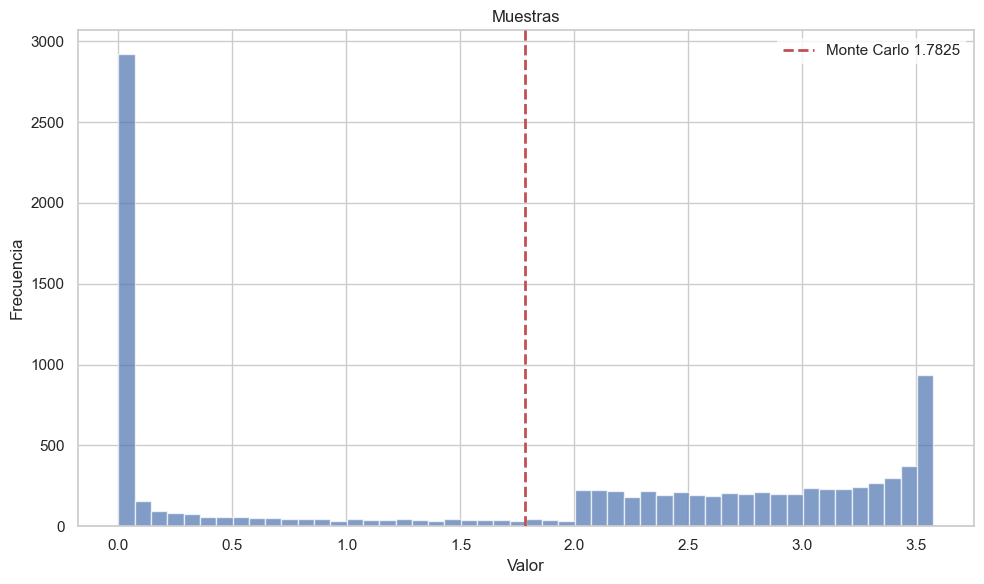

In [41]:
histograma(muestras, montecarlo)

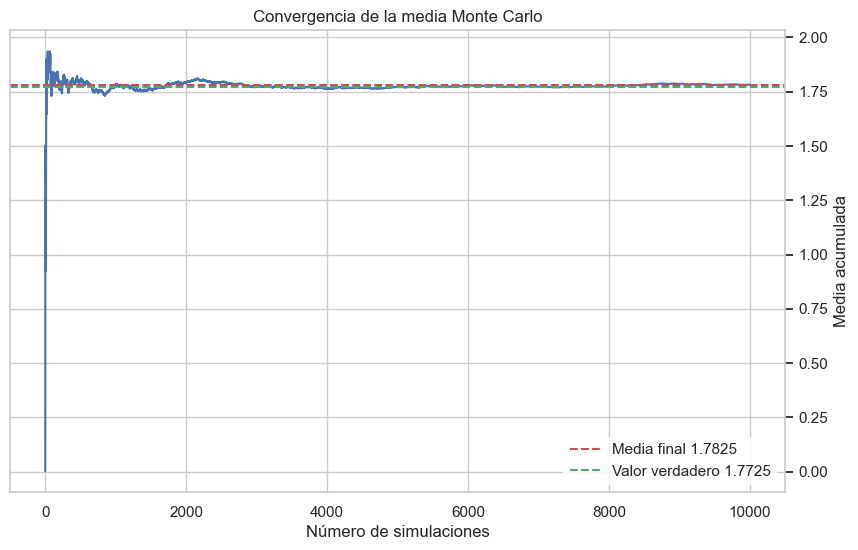

In [45]:
tlc(muestras, verdadero)

# Ejercicio 10

$$\int_{0}^{\infty}\int_{0}^{x} e^{-(x+y)}\,dy\,dx.$$

## Solución analítica


$$
\int_{0}^{\infty}\!\!\int_{0}^{x} e^{-(x+y)}\,dy\,dx
=\int_{0}^{\infty} e^{-x}\!\left(\int_{0}^{x} e^{-y}\,dy\right)dx.
$$

Integrando a $y$ con $x$ fijo:

$$
\int_{0}^{x} e^{-y}\,dy=\big[-e^{-y}\big]_{0}^{x}=1-e^{-x}.
$$

Sustituyendo:

$$
\int_{0}^{\infty} e^{-x}\big(1-e^{-x}\big)\,dx
=\int_{0}^{\infty} e^{-x}\,dx-\int_{0}^{\infty} e^{-2x}\,dx.
$$

Evaluando ambas integrales impropias:

$$
\int_{0}^{\infty} e^{-x}\,dx=\big[-e^{-x}\big]_{0}^{\infty}=1,\qquad
\int_{0}^{\infty} e^{-2x}\,dx=\left[-\tfrac{1}{2}e^{-2x}\right]_{0}^{\infty}=\tfrac{1}{2}.
$$

Restando:

$$
1-\tfrac{1}{2}=\tfrac{1}{2}.
$$


## Estimación Monte Carlo

Sea:

$$
\theta=\int_{0}^{\infty}\!\!\int_{0}^{x} e^{-(x+y)}\,dy\,dx.
$$

Entonces:

$$
\theta=\int_{0}^{\infty}\!\!\int_{0}^{\infty}\mathbf{1}\{x_2\le x_1\}\,e^{-(x_1+x_2)}\,dx_2\,dx_1,
\qquad g(x_1,x_2)=\mathbf{1}\{x_2\le x_1\}.
$$

Sabemos que:

$$
\theta=\mathbb{E}\big[g(X_1,X_2)\big],\quad X_1,X_2\stackrel{iid}{\sim}\mathrm{Exp}(1).
$$

Estimador Monte Carlo:

$$
\widehat{\theta}_k=\frac{1}{k}\sum_{i=1}^{k} g(x_{i1},x_{i2})
=\frac{1}{k}\sum_{i=1}^{k}\mathbf{1}\{x_{i2}\le x_{i1}\},
\quad (x_{i1},x_{i2})\stackrel{iid}{\sim}\mathrm{Exp}(1).
$$

(Para simular $x_{ij}$: $x_{ij}=-\ln(1-u_{ij})$, $u_{ij}\stackrel{iid}{\sim}\mathrm{Unif}(0,1)$, con el método de la transformada inversa).


In [ ]:
k = 1000
u1 = np.random.random(k)
u2 = np.random.random(k)

e1 = -np.log(u1)
e2 = -np.log(u2)

def g(e1, e2):
    if e1 < e2:
        return 1
    else:
        return 0

muestras = [g(e1[i], e2[i]) for i in range(k)]

montecarlo = np.mean(muestras)
montecarlo


np.float64(0.508)

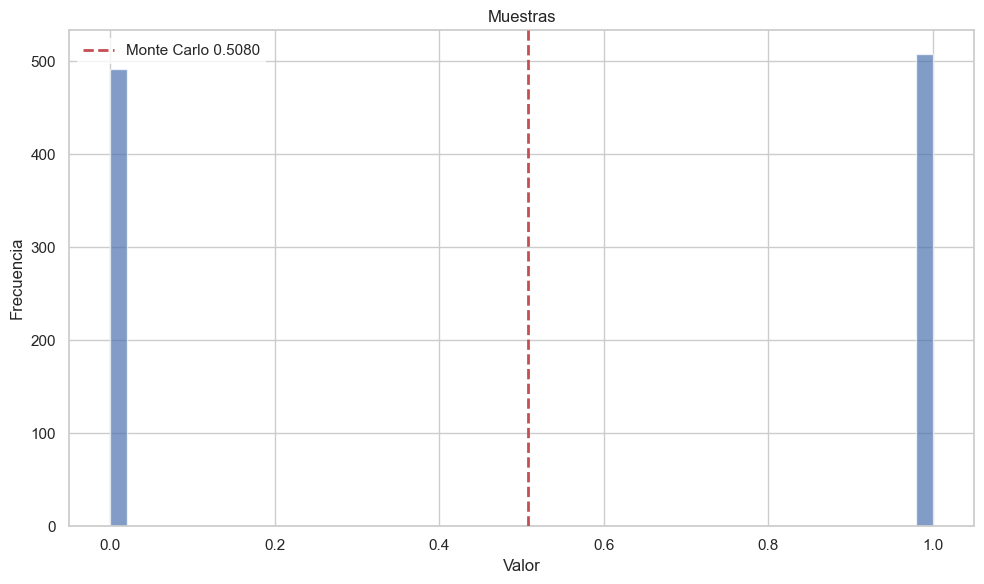

In [9]:
histograma(muestras, montecarlo)

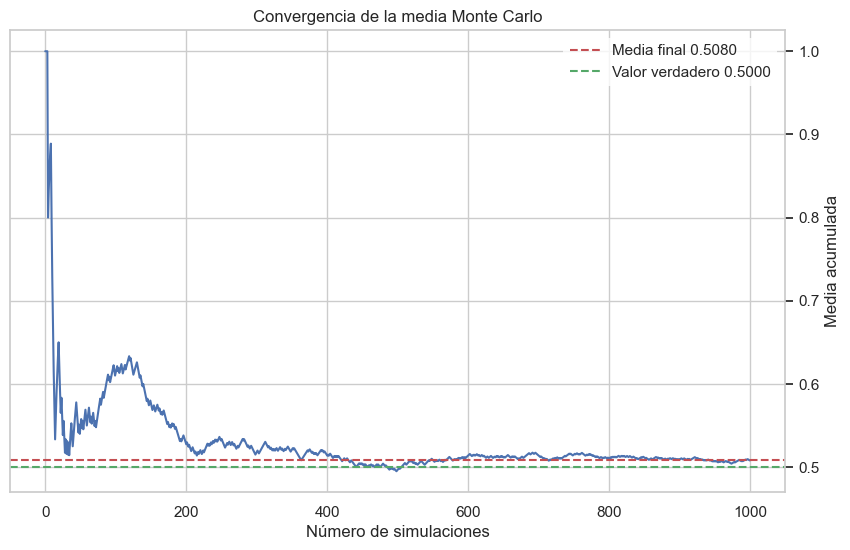

In [10]:
tlc(muestras, 1/2)

# Ejercicio 12

Sea $U\sim\mathcal U(0,1)$. Aproximar por simulación:

(a) $\operatorname{Corr}\big(U,\sqrt{1-U^2}\big)$,

(b) $\operatorname{Corr}\big(U^2,\sqrt{1-U^2}\big)$.


**Justificación matemática**

Se tiene $\mathbb E[U]=\tfrac12$, $\operatorname{Var}(U)=\tfrac1{12}$, $\mathbb E\big[\sqrt{1-U^2}\big]=\tfrac\pi4$, $\mathbb E[(\sqrt{1-U^2})^2]=\tfrac23$.

$\displaystyle \mathbb E[U\sqrt{1-U^2}]=\int_0^1 u\sqrt{1-u^2}\,du=\tfrac13$, por lo que $\operatorname{Cov}=\tfrac13-\tfrac\pi8$.

$\displaystyle \mathbb E[U^2\sqrt{1-U^2}]=\int_0^1 u^2\sqrt{1-u^2}\,du=\tfrac\pi{16}$ y $\operatorname{Cov}=\tfrac\pi{16}-\tfrac\pi{12}=-\tfrac\pi{48}$.

Así, con $\sigma_A^2=\tfrac23-(\tfrac\pi4)^2$ y $\sigma_{U^2}^2=\tfrac15-\tfrac19=\tfrac4{45}$:

$\displaystyle \rho_1=\frac{\tfrac13-\tfrac\pi8}{\sqrt{1/12}\,\sqrt{\tfrac23-(\tfrac\pi4)^2}},\qquad \rho_2=\frac{-\tfrac\pi{48}}{\sqrt{4/45}\,\sqrt{\tfrac23-(\tfrac\pi4)^2}}$.


In [ ]:
# Ejercicio 12 — numérico exacto y validación MC
import numpy as np, math
sigU = math.sqrt(1/12)
sigA = math.sqrt(2/3 - (math.pi/4)**2)
sigU2 = math.sqrt(4/45)
rho1_exact = (1/3 - math.pi/8)/(sigU*sigA)
rho2_exact = (-(math.pi)/48)/(sigU2*sigA)
rng = np.random.default_rng(0)
n = 500_000
u = rng.random(n)
a = np.sqrt(1-u**2)
rho1_mc = np.corrcoef(u, a)[0,1]
rho2_mc = np.corrcoef(u**2, a)[0,1]
rho1_exact, rho1_mc, rho2_exact, rho2_mc

# Ejercicio 14

Sea $U_i\sim\mathcal U(0,1)$ i.i.d. Definir
$$N=\max\Big\{n:\prod_{i=1}^{n}U_i\ge e^{-3}\Big\},\quad \text{con }\prod_{i=0}^{0}U_i=1.$$
a) Estimar $\mathbb E[N]$ por simulación.  
b) Estimar $\mathbb P[N=i]$ para $i=0,1,2,3,4,5,6$.


**Justificación matemática**

Tomando $S_n=-\sum_{i=1}^n\ln U_i$ con $-\ln U_i\sim\mathrm{Exp}(1)$ i.i.d., se pide $N=\max\{n:S_n\le 3\}$.  
Esto es el conteo de llegadas de un Proceso de Poisson de tasa 1 hasta tiempo 3: $N\sim\mathrm{Poisson}(3)$,  
por lo que $\mathbb E[N]=3$ y $\mathbb P(N=i)=e^{-3}\,3^i/i!$.


In [ ]:
# Ejercicio 14 — verificación por simulación
import numpy as np, math
rng = np.random.default_rng(0)
M = 500_000
def N_prod(rng):
    s = 0.0; n = 0
    while s <= 3.0:
        s += -math.log(rng.random())
        n += 1
    return n-1
vals = np.fromiter((N_prod(rng) for _ in range(M)), dtype=int, count=M)
EN_mc = np.mean(vals)
pmf_mc = {i: np.mean(vals==i) for i in range(7)}
pmf_ex = {i: math.exp(-3)*3**i/math.factorial(i) for i in range(7)}
EN_mc, 3.0, pmf_mc, pmf_ex